In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC


In [ ]:
data = pd.read_csv('cell_samples.csv')
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
data['Class'].unique()

array([2, 4])

In [ ]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

,count
Class,
2,458
4,241


In [ ]:
 bengin_df = cell_df[cell_df['Class'] == 2][0:200]
 malignant_df = cell_df[cell_df['Class'] == 4][0:200]

 help(bengin_df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      -

<Axes: xlabel='Clump', ylabel='UnifSize'>

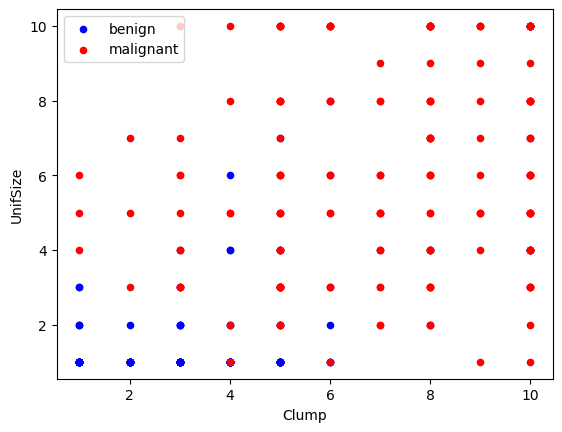

In [ ]:
benign_df = cell_df[cell_df['Class'] == 2][0:200]
malignant_df = cell_df[cell_df['Class'] == 4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='benign')
malignant_df[0:200].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant', ax=axes)

In [ ]:
 cell_df.dtypes
 cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
 cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
 cell_df.dtypes

<ipython-input-31-47f55ab1af65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [ ]:
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

x= np.asarray(feature_df)
y = np.asarray(cell_df['Class'])
x[0:5]
y[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
  train_test_split(x,y,test_size= 0.2,random_state=4)
  x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

In [ ]:
from sklearn import svm
svm.SVC(kernel='linear',gamma='auto',C=2)


SVC(C=2, gamma='auto', kernel='linear')

In [ ]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [45]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_predict)
cm


array([[85,  5],
       [ 0, 47]])

Text(108.22222222222221, 0.5, 'Truth')

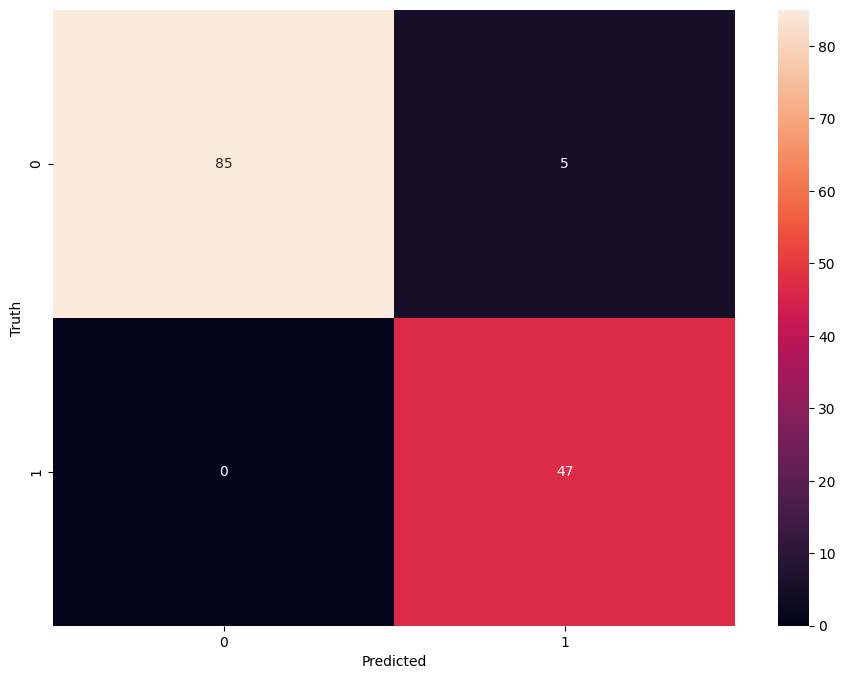

In [46]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(11,8))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')